# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset: https://www.kaggle.com/datasets/nitishsharma01/olympics-124-years-datasettill-2020

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

# Importing all necessary libraries

In [151]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,10)

# read csv file
winter_games_df = pd.read_csv("Athletes_winter_games.csv")
winter_games_df.head(10)

,Unnamed: 0,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,4,Christine Jacoba Aaftink,F,21.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
1,5,Christine Jacoba Aaftink,F,21.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
2,6,Christine Jacoba Aaftink,F,25.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
3,7,Christine Jacoba Aaftink,F,25.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
4,8,Christine Jacoba Aaftink,F,27.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
5,9,Christine Jacoba Aaftink,F,27.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,10,Per Knut Aaland,M,31.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
7,11,Per Knut Aaland,M,31.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN
8,12,Per Knut Aaland,M,31.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
9,13,Per Knut Aaland,M,31.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [152]:
# know the number of rows and columns that are present in winter games dataframe.
winter_games_df.shape

(48564, 13)

In [153]:
# Know the column names in winter games dataframe.
winter_games_df.columns

Index(['Unnamed: 0', 'Name', 'Sex', 'Age', 'Team', 'NOC', 'Games', 'Year',
       'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [154]:
# Know the information such as each column names,data type,non null count of each columns in winter games dataframe.

winter_games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48564 entries, 0 to 48563
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  48564 non-null  int64  
 1   Name        48564 non-null  object 
 2   Sex         48564 non-null  object 
 3   Age         48279 non-null  float64
 4   Team        48564 non-null  object 
 5   NOC         48564 non-null  object 
 6   Games       48564 non-null  object 
 7   Year        48564 non-null  int64  
 8   Season      48564 non-null  object 
 9   City        48564 non-null  object 
 10  Sport       48564 non-null  object 
 11  Event       48564 non-null  object 
 12  Medal       5695 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 4.8+ MB


In [155]:
# Know the numerical and categorical columns in winter games dataframe.
numeric_cols = winter_games_df.select_dtypes(include=['number']).columns
print(numeric_cols)

non_numeric_cols = winter_games_df.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index(['Unnamed: 0', 'Age', 'Year'], dtype='object')
Index(['Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport',
       'Event', 'Medal'],
      dtype='object')


In [156]:
# Know the count,mean,max,min,standard deviation values for numerical columns in winter games dataframe. 
winter_games_df.describe()

,Unnamed: 0,Age,Year
count,48564.000000,48279.000000,48564.000000
mean,137838.979059,25.039147,1987.825097
std,77152.638568,4.777735,22.070100
min,4.000000,11.000000,1924.000000
25%,73357.750000,22.000000,1972.000000
50%,134752.500000,24.000000,1994.000000
75%,205753.250000,28.000000,2006.000000
max,271115.000000,58.000000,2014.000000


In [157]:
winter_games_df['Year'].unique()

array([1988, 1992, 1994, 2002, 1980, 2014, 1998, 2006, 1960, 1964, 1984,
       1952, 1956, 2010, 1968, 1972, 1976, 1924, 1928, 1948, 1932, 1936],
      dtype=int64)

In [158]:
# know how many teams participated in winter olympic games.
winter_games_df['Team'].value_counts()

United States                  3321
Canada                         2590
Norway                         2328
Sweden                         2231
Italy                          2209
                               ... 
Uruguay                           1
Ghana                             1
Individual Olympic Athletes       1
Tonga                             1
Paraguay                          1
Name: Team, Length: 221, dtype: int64

In [159]:
# Yearly report of Number of games held in olympics 
winter_games_df['Games'].value_counts()

2014 Winter    4891
2010 Winter    4402
2006 Winter    4382
2002 Winter    4109
1998 Winter    3605
1992 Winter    3436
1994 Winter    3160
1988 Winter    2639
1984 Winter    2134
1968 Winter    1891
1976 Winter    1861
1964 Winter    1778
1980 Winter    1746
1972 Winter    1655
1956 Winter    1307
1960 Winter    1116
1952 Winter    1088
1948 Winter    1075
1936 Winter     895
1928 Winter     582
1924 Winter     460
1932 Winter     352
Name: Games, dtype: int64

In [160]:
winter_games_df['Year'].unique()

array([1988, 1992, 1994, 2002, 1980, 2014, 1998, 2006, 1960, 1964, 1984,
       1952, 1956, 2010, 1968, 1972, 1976, 1924, 1928, 1948, 1932, 1936],
      dtype=int64)

In [161]:

winter_games_df['Sport'].value_counts()

Cross Country Skiing         9133
Alpine Skiing                8829
Speed Skating                5613
Ice Hockey                   5456
Biathlon                     4893
Bobsleigh                    3058
Ski Jumping                  2401
Figure Skating               2244
Short Track Speed Skating    1534
Luge                         1479
Nordic Combined              1344
Freestyle Skiing              937
Snowboarding                  936
Curling                       463
Skeleton                      199
Military Ski Patrol            24
Alpinism                       21
Name: Sport, dtype: int64

In [162]:

winter_games_df['Medal'].value_counts()

Gold      1913
Silver    1896
Bronze    1886
Name: Medal, dtype: int64

In [163]:
# Know all the events that teams had participated in respective years 

winter_games_df.groupby(["Team","Year"])["Event"].value_counts()

Team          Year  Event                           
Albania       2006  Alpine Skiing Men's Giant Slalom    1
                    Alpine Skiing Men's Slalom          1
                    Alpine Skiing Men's Super G         1
              2010  Alpine Skiing Men's Giant Slalom    1
                    Alpine Skiing Men's Slalom          1
                                                       ..
Yugoslavia-2  1984  Bobsleigh Men's Four                4
                    Bobsleigh Men's Two                 2
              1992  Bobsleigh Men's Two                 2
Zimbabwe      2014  Alpine Skiing Men's Giant Slalom    1
                    Alpine Skiing Men's Slalom          1
Name: Event, Length: 16956, dtype: int64

In [164]:
# Which age has won most of the gold medal

winter_games_df.loc[winter_games_df['Medal'] == 'Gold']['Age'].value_counts().head()


24.0    187
25.0    170
23.0    162
26.0    155
27.0    151
Name: Age, dtype: int64

In [165]:
#Count the number of gold,silver and bronze medals won by male and female.
medals_by_sex =  winter_games_df.groupby(["Sex"])["Medal"].value_counts().to_frame()
medals_by_sex

Medal
Sex Medal        
F   Gold      607
    Silver    607
    Bronze    597
M   Gold     1306
    Bronze   1289
    Silver   1289

In [166]:
# Using pivot table for better understanding to see all the teams who won which medal for which sport in which year.
winter_games_pt = winter_games_df.pivot_table("Event", ["Team", "Year"], "Medal", aggfunc = np.sum) 
winter_games_pt

Medal                                                           Bronze  \
Team           Year                                                      
Australia      1924                                                NaN   
               1994  Short Track Speed Skating Men's 5,000 metres R...   
               1998                       Alpine Skiing Women's Slalom   
               2002                                                NaN   
               2006                   Freestyle Skiing Women's Aerials   
...                                                                ...   
West Germany-1 1984                                                NaN   
               1988  Luge Mixed (Men)'s DoublesLuge Mixed (Men)'s D...   
West Germany-2 1972                                                NaN   
Yugoslavia     1984                                                NaN   
               1988           Ski Jumping Men's Large Hill, Individual   

Medal                                                             Gold  \
Team           Year                                                      
Australia      1924                            Alpinism Mixed Alpinism   
               1994                                                NaN   
               1998                                                NaN   
               2002  Short Track Speed Skating Men's 1,000 metresFr...   
               2006                      Freestyle Skiing Men's Moguls   
...                                                                ...   
West Germany-1 1984  Luge Mixed (Men)'s DoublesLuge Mixed (Men)'s D...   
               1988                                                NaN   
West Germany-2 1972             Bobsleigh Men's TwoBobsleigh Men's Two   
Yugoslavia     1984                                                NaN   
               1988                                                NaN   

Medal                                                           Silver  
Team           Year                                                     
Australia      1924                                                NaN  
               1994                                                NaN  
               1998                                                NaN  
               2002                                                NaN  
               2006                                                NaN  
...                                                                ...  
West Germany-1 1984                                                NaN  
               1988                                                NaN  
West Germany-2 1972                                                NaN  
Yugoslavia     1984                   Alpine Skiing Men's Giant Slalom  
               1988  Ski Jumping Men's Large Hill, TeamAlpine Skiin...  

[534 rows x 3 columns]

In [167]:
# Know the null values
winter_games_df.isnull().value_counts()

Unnamed: 0  Name   Sex    Age    Team   NOC    Games  Year   Season  City   Sport  Event  Medal
False       False  False  False  False  False  False  False  False   False  False  False  True     42595
                                                                                          False     5684
                          True   False  False  False  False  False   False  False  False  True       274
                                                                                          False       11
dtype: int64

In [168]:
# Know the null values that are present in Medal column.
# In this we can clearly see that Medal column has 42869 null values and 5695 non null values.
winter_games_df["Medal"].isnull().value_counts()

True     42869
False     5695
Name: Medal, dtype: int64

In [169]:
# Know the null values that are present in Age column.
# In this we can clearly see that Age column has 285 null values and 48279 non null values.
winter_games_df["Age"].isnull().value_counts()

False    48279
True       285
Name: Age, dtype: int64

In [170]:
# Top 10 teams who won more gold medals in olympic winter games.

top10_gold_winners = winter_games_df.loc[winter_games_df['Medal'] == 'Gold']['Team'].value_counts().head(10)
top10_gold_winners

Canada           289
Soviet Union     228
Norway           151
United States    141
Sweden           125
Germany          115
Russia            72
Austria           67
Finland           66
South Korea       50
Name: Team, dtype: int64

In [171]:
# Correlation
winter_games_df.corr()

#there is not much to correlate in this dataset.

,Unnamed: 0,Age,Year
Unnamed: 0,1.000000,0.001207,0.027029
Age,0.001207,1.000000,0.056932
Year,0.027029,0.056932,1.000000


## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

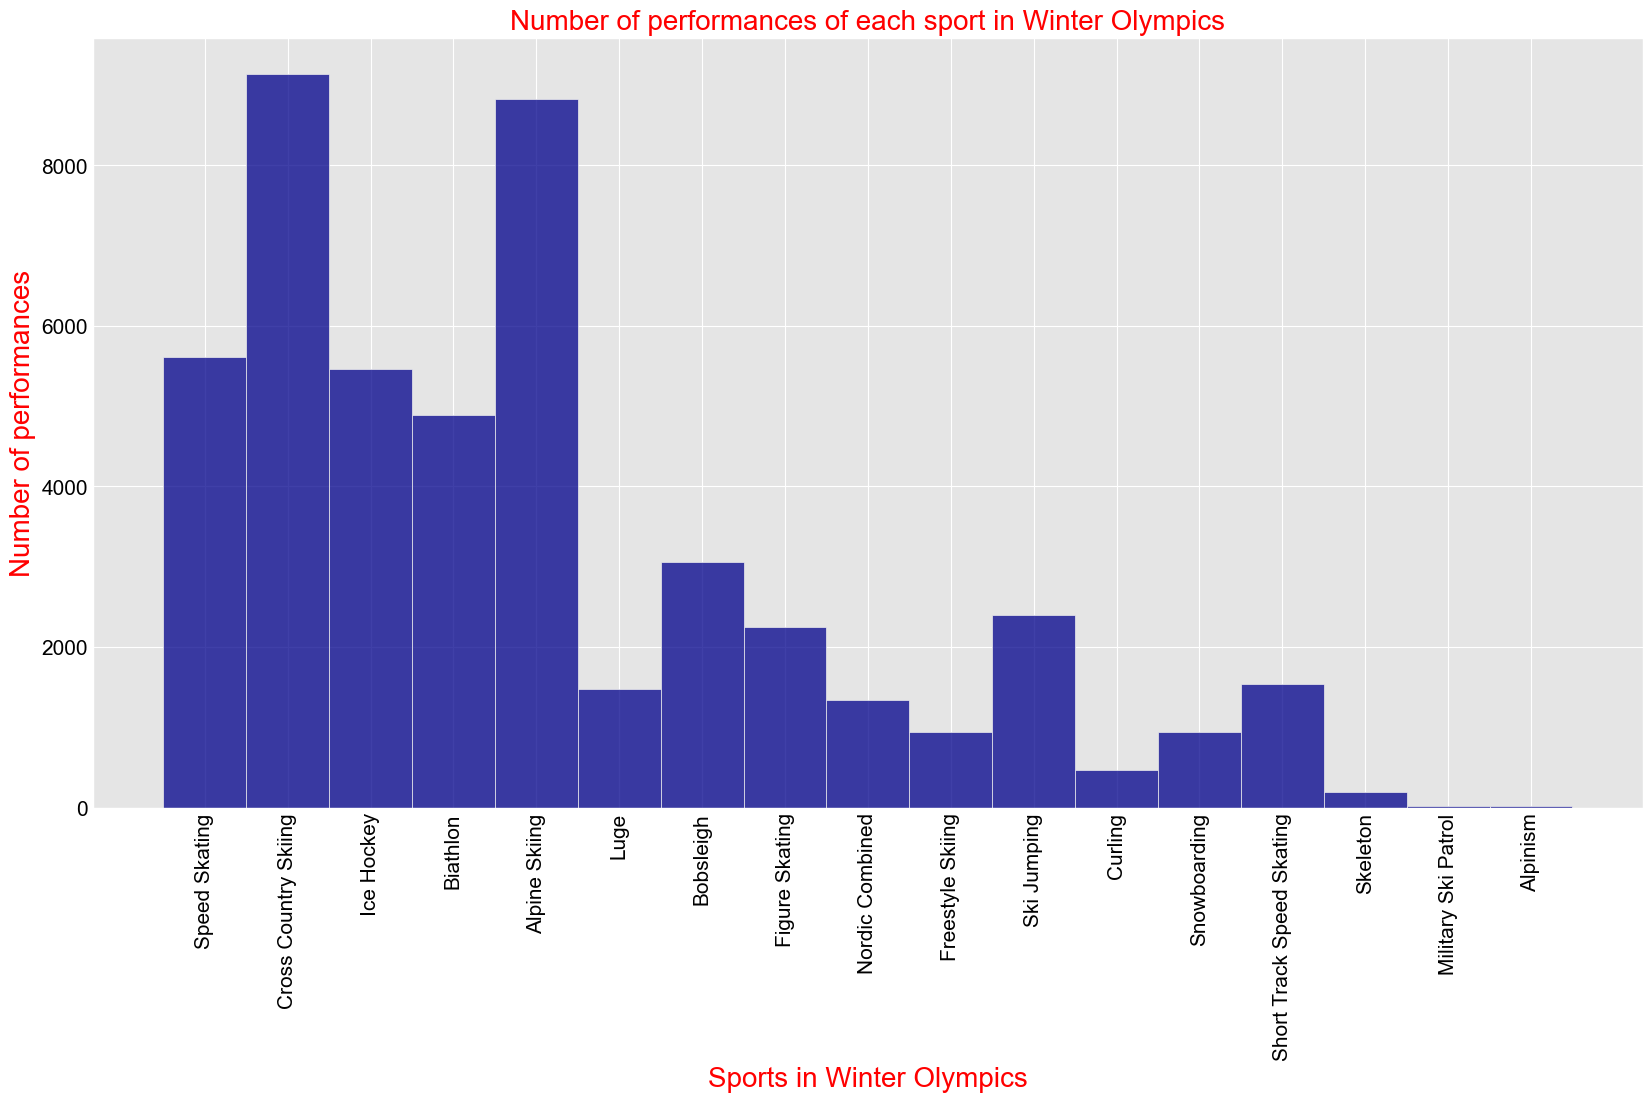

In [172]:
# Plot a bar chart for Number of performances of each sport in Winter Olympics

style.use('ggplot')
sns.histplot(winter_games_df['Sport'], color='darkblue')
plt.title('Number of performances of each sport in Winter Olympics',color = 'red',size=20)
plt.xticks(color = 'black',size=15,rotation=90)
plt.yticks(color = 'black',size=15)
plt.xlabel('Sports in Winter Olympics',color = 'red',size=20)
plt.ylabel('Number of performances',color = 'red',size=20)
plt.savefig('vertical_bar_chart.png')
plt.show()

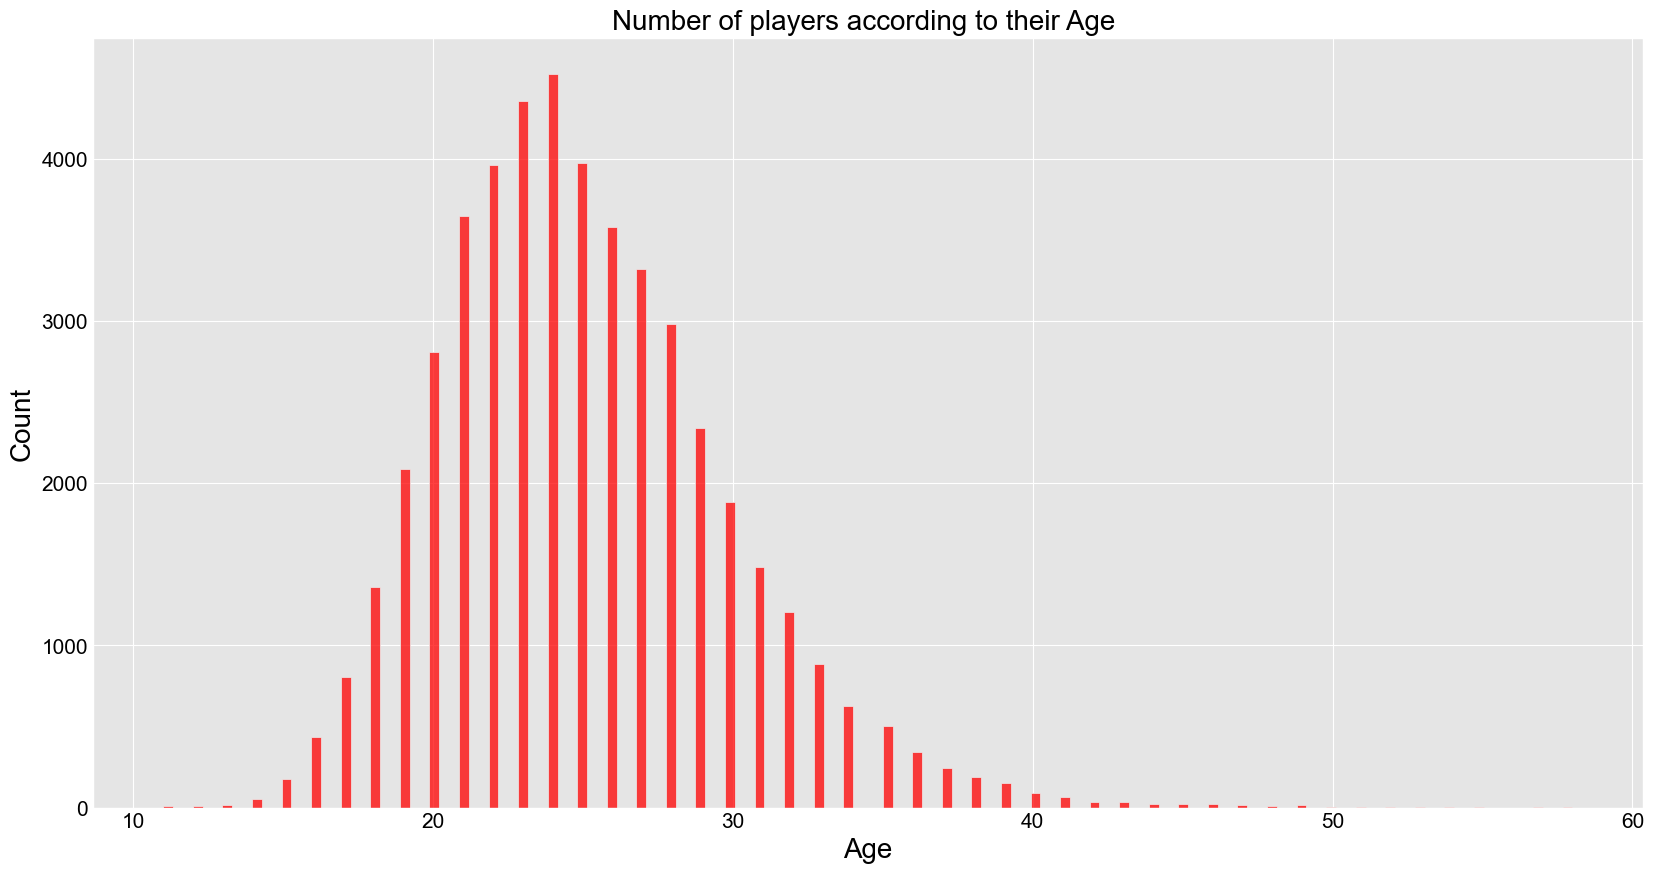

In [173]:
# Histogram
sns.histplot(winter_games_df['Age'], color='red')
plt.title('Number of players according to their Age ',color = 'black',size=20)
plt.xticks(color = 'black',size=15)
plt.yticks(color = 'black',size=15)
plt.xlabel('Age',color = 'black',size=20)
plt.ylabel('Count',color = 'black',size=20)
plt.savefig('histogram.png')
plt.show()

In [ ]:
# Plot a bar chart for the number of gold,silver and bronze medals won by male and female.

df_group = winter_games_df.groupby(["Sex"])['Medal'].value_counts()
df_group

df_group.plot.bar(color='hotpink',edgecolor = 'yellow')
plt.title('Number of Medals won by Male and Female',color = 'black')
plt.xticks(color = 'black',size=20)
plt.yticks(color = 'black',size=20)
plt.xlabel('Sex',color = 'black')
plt.ylabel('Number of Medals',color = 'black')
plt.legend(title = 'Medals', fontsize = 12 , labelcolor='black')
plt.savefig('bar_chart.png')

plt.show()

In [ ]:
# Plot a Horizontal bar chart for Top 10 teams who won more gold medals in olympic winter games.

import mplcyberpunk
style.use('cyberpunk')

top10_gold_winners.plot.barh(edgecolor = 'yellow')
plt.title('Top 10 teams who won more gold medals in olympic winter games',color = 'yellow',size=30)
plt.xticks(color = 'hotpink',size=20)
plt.yticks(color = 'hotpink',size=20)
plt.xlabel('Number of Gold Medals',color = 'orange',size=30)
plt.ylabel('Top 10 Teams',color = 'orange',size=30)
plt.show()

plt.savefig('Horizontal_bar_chart.png')

plt.show()




## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset?

Winter olympic games got cancelled years - 1940 and 1944. so in our dataset there is no 1940 and 1944 year games.Also we can see that after 1992 again the next olympic happened in 1994 because to change the schedule of the Olympic Games so that the Summer and Winter Games would be held in different years.

2. Do you have any concerns about your dataset? 

Medal column has an object data type.For performing sum,count,max,min calculation we need that Medal column should be an int data type.

3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 

This dataset has null values in Age column and Medal Column. So for better understanding we need to sort this missing values.